In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
import warnings
warnings.filterwarnings("ignore")
from itertools import cycle
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans

# Loading The Data: 2014 Boston Marathon Results

In [2]:
marathon = pd.read_csv('results.csv')
marathon.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [3]:
marathon.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

# Sampling

In [4]:
marathon = marathon.sample(frac=0.1, random_state = 0)

# Choose some useful variables and order them

In [5]:
marathon = marathon.drop(['bib','city','country','ctz','division','gender','genderdiv','overall','name','state'], 1)

In [6]:
marathon[['10k','25k','age','official','35k','pace','30k','5k','half','20k','40k']] = marathon[['5k','10k','20k','half','25k','30k','35k','40k','age','official','pace']]

# Recasting Objects

In [7]:
columns = marathon[['5k','10k','20k','25k','30k','35k','40k','age','official','pace']]

for column in columns: 
    marathon[column] = pd.to_numeric(marathon[column], errors='coerce')

In [8]:
marathon.dtypes

10k         float64
25k         float64
age         float64
official    float64
35k         float64
pace        float64
30k         float64
5k          float64
half          int64
20k         float64
40k         float64
dtype: object

In [9]:
marathon = marathon.dropna()

In [10]:
marathon.describe()

,10k,25k,age,official,35k,pace,30k,5k,half,20k,40k
count,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000
mean,25.739991,51.750755,105.669460,111.581791,134.062183,164.571924,196.854289,229.093973,42.184144,242.901238,9.272669
std,4.222130,8.761738,19.466659,20.626223,25.980339,33.510329,41.382279,48.685083,11.468917,51.494791,1.964202
min,8.380000,17.650000,37.650000,39.720000,47.670000,58.600000,70.230000,79.830000,18.000000,84.650000,3.230000
25%,22.650000,45.322500,91.497500,96.492500,115.185000,140.302500,166.885000,193.822500,33.000000,205.777500,7.850000
50%,25.230000,50.640000,102.675000,108.375000,129.925000,158.905000,189.240000,219.775000,42.000000,233.500000,8.920000
75%,28.445000,57.050000,116.727500,123.230000,148.830000,184.015000,221.810000,259.080000,50.000000,275.465000,10.520000
max,45.680000,94.450000,211.750000,222.070000,281.850000,376.380000,449.330000,508.350000,81.000000,534.220000,20.380000


# Univariate Distributions

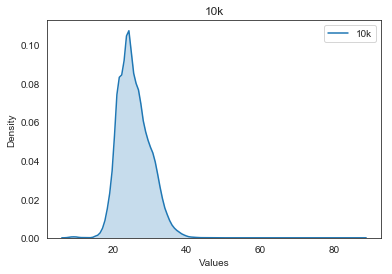

count    31649.000000
mean        25.678261
std          4.215381
min          7.750000
25%         22.620000
50%         25.050000
75%         28.400000
max         86.950000
Name: 10k, dtype: float64


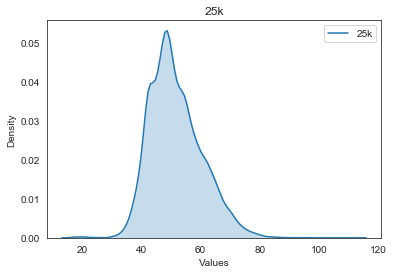

count    31649.000000
mean        51.629039
std          8.710102
min         16.620000
25%         45.370000
50%         50.280000
75%         57.000000
max        112.380000
Name: 25k, dtype: float64


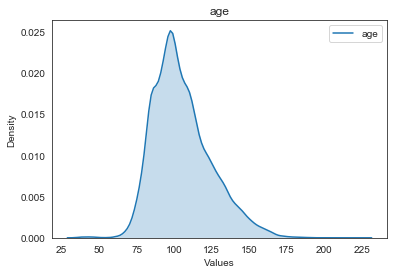

count    31649.000000
mean       105.321404
std         19.159500
min         36.100000
25%         91.670000
50%        102.000000
75%        116.150000
max        224.350000
Name: age, dtype: float64


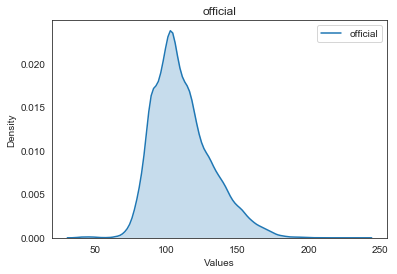

count    31649.000000
mean       111.211481
std         20.306387
min         38.030000
25%         96.750000
50%        107.680000
75%        122.680000
max        236.670000
Name: official, dtype: float64


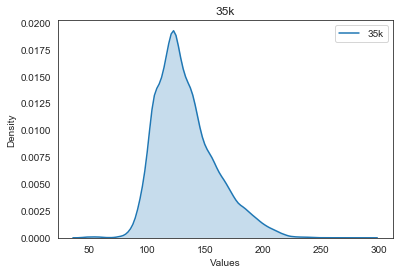

count    31649.000000
mean       133.581175
std         25.571480
min         45.800000
25%        115.430000
50%        128.850000
75%        147.700000
max        289.020000
Name: 35k, dtype: float64


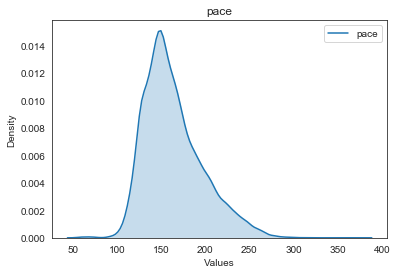

count    31649.000000
mean       163.894883
std         32.889354
min         56.450000
25%        140.520000
50%        157.500000
75%        182.200000
max        376.380000
Name: pace, dtype: float64


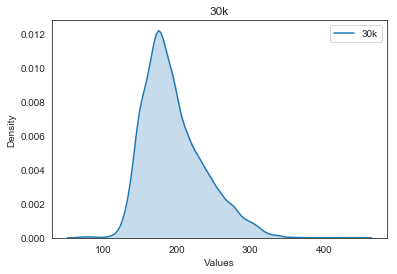

count    31649.000000
mean       196.033373
std         40.775036
min         67.420000
25%        166.950000
50%        187.850000
75%        219.370000
max        449.330000
Name: 30k, dtype: float64


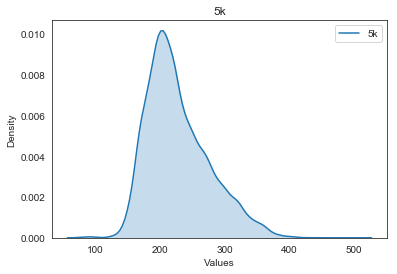

count    31649.000000
mean       228.189990
std         48.074493
min         76.100000
25%        193.620000
50%        218.470000
75%        256.570000
max        508.350000
Name: 5k, dtype: float64


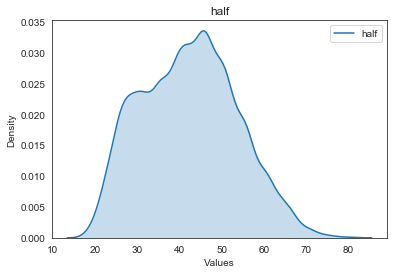

count    31649.000000
mean        42.385067
std         11.299795
min         18.000000
25%         33.000000
50%         42.000000
75%         50.000000
max         81.000000
Name: half, dtype: float64


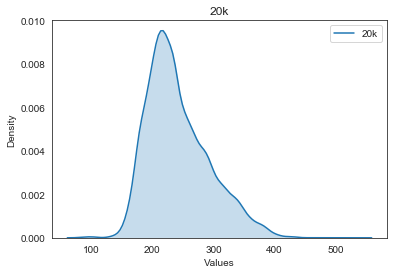

count    31649.000000
mean       241.952383
std         50.842552
min         80.600000
25%        205.300000
50%        231.980000
75%        272.200000
max        538.880000
Name: 20k, dtype: float64


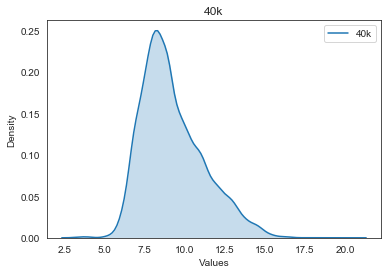

count    31649.000000
mean         9.236463
std          1.939150
min          3.080000
25%          7.830000
50%          8.850000
75%         10.380000
max         20.570000
Name: 40k, dtype: float64


In [16]:
columns_to_plot = marathon.columns
for column in columns_to_plot: 
    sns.kdeplot(marathon[column], shade=True)
    plt.title(column)
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.show()
    print(marathon[column].describe())

# Normalization: Preprocessing

In [12]:
X_normalized = normalize(marathon)
X_normalized_df = pd.DataFrame(normalize(marathon), columns = marathon.columns)

# Principal Components Analysis: Visualization

In [13]:
X_pca = PCA(n_components=2).fit_transform(X_normalized)
X_pca_df = pd.DataFrame(PCA(n_components=2).fit_transform(X_normalized))

# Mean-Shift

## All Features 

Number of Estimated Clusters: 4


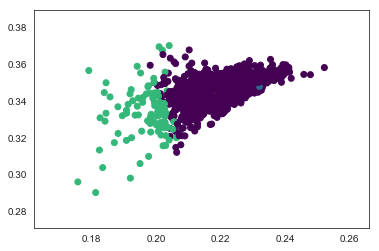

In [22]:
bandwidth = estimate_bandwidth(X_normalized)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_normalized_df)

ms_labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(ms_labels))

print("Number of Estimated Clusters: {}".format(n_clusters_))
plt.scatter(X_normalized_df['age'], X_normalized_df['pace'], c=ms_labels, cmap='viridis')
plt.show()

## 2 Principal Components 

Number of Estimated Clusters: 3


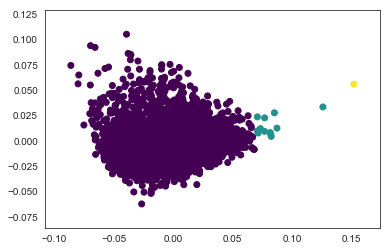

In [23]:
bandwidth2 = estimate_bandwidth(X_pca)
ms2 = MeanShift(bandwidth=bandwidth2, bin_seeding=True).fit(X_pca_df)

ms2_labels = ms2.labels_
cluster_centers2 = ms2.cluster_centers_
n_clusters_2 = len(np.unique(ms2_labels))

print("Number of Estimated Clusters: {}".format(n_clusters_2))
plt.scatter(X_pca_df.iloc[:,0], X_pca_df.iloc[:,1], c=ms2_labels, cmap='viridis')
plt.show()

# K-Means

## All Features

Number of Estimated Clusters: 3


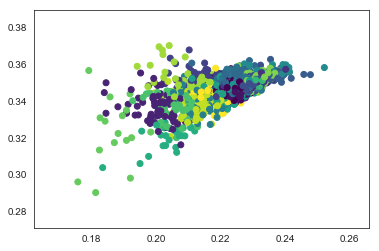

In [24]:
km = KMeans(n_clusters=22, random_state=0).fit(X_normalized_df)

km_labels = km.labels_
print("Number of Estimated Clusters: {}".format(n_clusters_2))
plt.scatter(X_normalized_df['age'], X_normalized_df['pace'], c=km_labels, cmap='viridis')
plt.show()

## 2 Principal Components 

Number of Estimated Clusters: 3


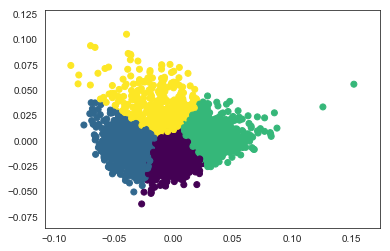

In [25]:
km2 = KMeans(n_clusters=4, random_state=0).fit(X_pca_df)

km2_labels = km2.labels_
print("Number of Estimated Clusters: {}".format(n_clusters_2))
plt.scatter(X_pca_df.iloc[:,0], X_pca_df.iloc[:,1], c=km2_labels, cmap='viridis')
plt.show()

# Spectral

## All Features

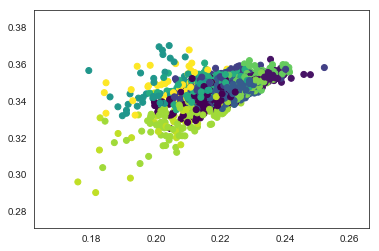

In [15]:
n_clusters=22

sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_normalized_df)

sc_labels = sc.labels_
plt.scatter(X_normalized_df['age'], X_normalized_df['pace'], c=sc_labels, cmap='viridis')
plt.show()

## 2 Principal Components 

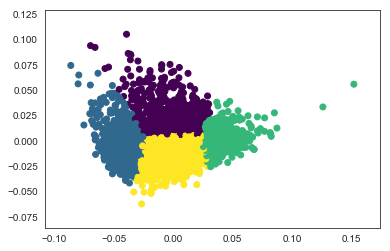

In [16]:
n_clusters2=4

sc2 = SpectralClustering(n_clusters=n_clusters2)
sc2.fit(X_pca_df)

sc2_labels = sc2.labels_
plt.scatter(X_pca_df.iloc[:,0], X_pca_df.iloc[:,1], c=sc2_labels, cmap='viridis')
plt.show()

# Affinity Propagation

## All Features

In [17]:
af = AffinityPropagation().fit(X_normalized_df)
print('Model Fitting Status: Complete.')

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
af_labels = af.labels_
print('Estimated Number of Clusters: {}'.format(n_clusters_))

Model Fitting Status: Complete.
Estimated Number of Clusters: 83


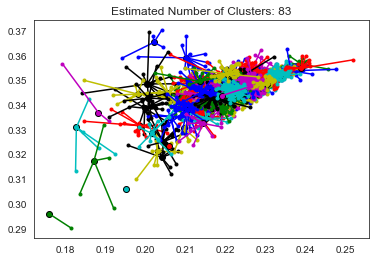

In [18]:
plt.figure()
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for i, color in zip(range(n_clusters_), colors):
    class_members = af_labels == i
    cluster_center = X_normalized[cluster_centers_indices[i]]
    plt.plot(X_normalized[[class_members, 2]], X_normalized[[class_members, 5]], color + '.')
    plt.plot(cluster_center[2],
             cluster_center[5],
             'o',
             markerfacecolor=color,
             markeredgecolor='k')
    for x in X_normalized[class_members]:
        plt.plot([cluster_center[2], x[2]], [cluster_center[5], x[5]], color)

plt.title('Estimated Number of Clusters: {}'.format(n_clusters_))
plt.show()

## 2 Principal Components

In [30]:
af2 = AffinityPropagation().fit(X_pca_df)
print('Model Fitting Status: Complete.')

cluster_centers_indices = af2.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
af2_labels = af2.labels_
print('Estimated Number of Clusters: {}'.format(n_clusters_))

Model Fitting Status: Complete.
Estimated Number of Clusters: 849


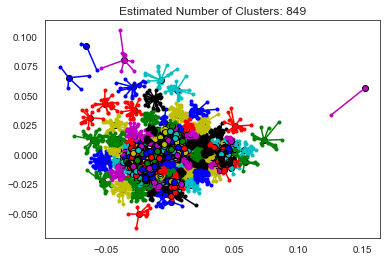

In [20]:
plt.figure()
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for i, color in zip(range(n_clusters_), colors):
    class_members = af2_labels == i
    cluster_center = X_pca[cluster_centers_indices[i]]
    plt.plot(X_pca[class_members, 0], X_pca[class_members, 1], color + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=color,
             markeredgecolor='k')
    for x in X_pca[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], color)

plt.title('Estimated Number of Clusters: {}'.format(n_clusters_))
plt.show()

# Evaluation: Silhouette Coefficients 

In [26]:
ms_silhouette = metrics.silhouette_score(X_normalized_df, ms_labels, metric='euclidean')
km_silhouette = metrics.silhouette_score(X_normalized_df, km_labels, metric='euclidean')
sc_silhouette = metrics.silhouette_score(X_normalized_df, sc_labels, metric='euclidean')
af_silhouette = metrics.silhouette_score(X_normalized, af_labels, metric='euclidean')

In [27]:
print('Mean-Shift Silhouette Coefficient: {:.2}'.format(ms_silhouette))
print('K-Means Silhouette Coefficient: {:.2}'.format(km_silhouette))
print('Spectral Silhouette Coefficient: {:.2}'.format(sc_silhouette))
print('Affinity Propagation Silhouette Coefficient: {:.2}'.format(af_silhouette))

Mean-Shift Silhouette Coefficient: 0.34
K-Means Silhouette Coefficient: 0.25
Spectral Silhouette Coefficient: 0.043
Affinity Propagation Silhouette Coefficient: 0.2


In [28]:
ms_pca_silhouette = metrics.silhouette_score(X_pca_df, ms2_labels, metric='euclidean')
km_pca_silhouette = metrics.silhouette_score(X_pca_df, km2_labels, metric='euclidean')
sc_pca_silhouette = metrics.silhouette_score(X_pca_df, sc2_labels, metric='euclidean')
af_pca_silhouette = metrics.silhouette_score(X_pca, af2_labels, metric='euclidean')

In [29]:
print('PCA Mean-Shift Silhouette Coefficient: {:.2}'.format(ms_pca_silhouette))
print('PCA K-Means Silhouette Coefficient: {:.2}'.format(km_pca_silhouette))
print('PCA Spectral Silhouette Coefficient: {:.2}'.format(sc_pca_silhouette))
print('PCA Affinity Propagation Silhouette Coefficient: {:.2}'.format(af_pca_silhouette))

PCA Mean-Shift Silhouette Coefficient: 0.47
PCA K-Means Silhouette Coefficient: 0.35
PCA Spectral Silhouette Coefficient: 0.33
PCA Affinity Propagation Silhouette Coefficient: 0.13


# Changing Mean-Shift Model's Bandwidth

### Mean-Shift (All Features): Quantile = 0.1

Number of Estimated Clusters: 18


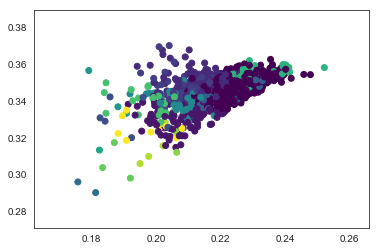

In [31]:
bandwidth_less = estimate_bandwidth(X_normalized, quantile = 0.1)
ms_bl = MeanShift(bandwidth=bandwidth_less, bin_seeding=True).fit(X_normalized_df)

ms_bl_labels = ms_bl.labels_
cluster_centers = ms_bl.cluster_centers_
n_clusters_ = len(np.unique(ms_bl_labels))

print("Number of Estimated Clusters: {}".format(n_clusters_))
plt.scatter(X_normalized_df['age'], X_normalized_df['pace'], c=ms_bl_labels, cmap='viridis')
plt.show()

### Mean-Shift (2 Principal Components): Quantile = 0.1

Number of Estimated Clusters: 6


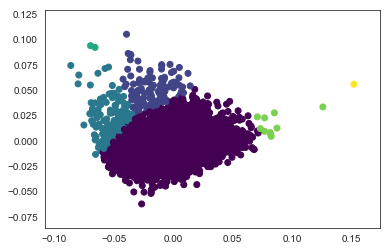

In [32]:
bandwidth2_bl = estimate_bandwidth(X_pca, quantile = 0.1)
ms2_bl = MeanShift(bandwidth=bandwidth2_bl, bin_seeding=True).fit(X_pca_df)

ms2_bl_labels = ms2_bl.labels_
cluster_centers2 = ms2_bl.cluster_centers_
n_clusters_2 = len(np.unique(ms2_bl_labels))

print("Number of Estimated Clusters: {}".format(n_clusters_2))
plt.scatter(X_pca_df.iloc[:,0], X_pca_df.iloc[:,1], c=ms2_bl_labels, cmap='viridis')
plt.show()

### Mean-Shift (All Features): Quantile = 0.5

Number of Estimated Clusters: 3


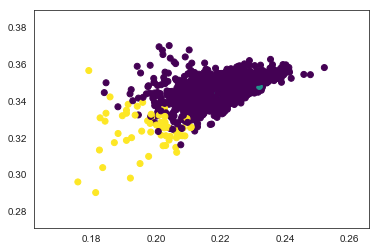

In [33]:
bandwidth_more = estimate_bandwidth(X_normalized, quantile = 0.5)
ms_bm = MeanShift(bandwidth=bandwidth_more, bin_seeding=True).fit(X_normalized_df)

ms_bm_labels = ms_bm.labels_
cluster_centers = ms_bm.cluster_centers_
n_clusters_ = len(np.unique(ms_bm_labels))

print("Number of Estimated Clusters: {}".format(n_clusters_))
plt.scatter(X_normalized_df['age'], X_normalized_df['pace'], c=ms_bm_labels, cmap='viridis')
plt.show()

### Mean-Shift (2 Principal Components): Quantile = 0.5

Number of Estimated Clusters: 2


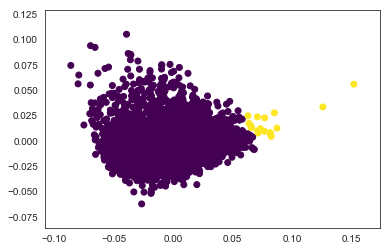

In [34]:
bandwidth2_bm = estimate_bandwidth(X_pca, quantile = 0.5)
ms2_bm = MeanShift(bandwidth=bandwidth2_bm, bin_seeding=True).fit(X_pca_df)

ms2_bm_labels = ms2_bm.labels_
cluster_centers2 = ms2_bm.cluster_centers_
n_clusters_2 = len(np.unique(ms2_bm_labels))

print("Number of Estimated Clusters: {}".format(n_clusters_2))
plt.scatter(X_pca_df.iloc[:,0], X_pca_df.iloc[:,1], c=ms2_bm_labels, cmap='viridis')
plt.show()

**Conclusion: For the Mean-Shift models, increasing bandwidth via the 'quantile' keyword argument decreases the number of found clusters. Conversely, decreasing bandwidth via the 'quantile' keyword argument increases the number of found clusters.** 

# Identifying Features Based on Cluster Resemblance

### All Features

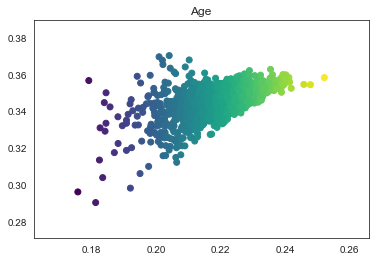

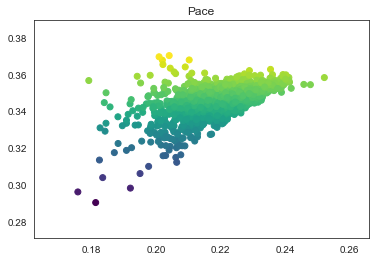

In [35]:
plt.scatter(X_normalized_df['age'], X_normalized_df['pace'], c=X_normalized_df['age'], cmap='viridis')
plt.title('Age')
plt.show()
plt.scatter(X_normalized_df['age'], X_normalized_df['pace'], c=X_normalized_df['pace'], cmap='viridis')
plt.title('Pace')
plt.show()

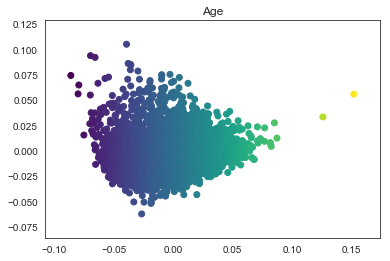

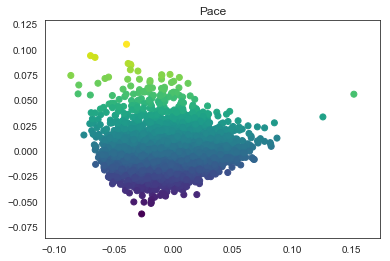

In [36]:
plt.scatter(X_pca_df.iloc[:,0], X_pca_df.iloc[:,1], c=X_pca_df.iloc[:,0], cmap='viridis')
plt.title('Age')
plt.show()
plt.scatter(X_pca_df.iloc[:,0], X_pca_df.iloc[:,1], c=X_pca_df.iloc[:,1], cmap='viridis')
plt.title('Pace')
plt.show()

**Conclusion: The closest resemblance seems to be between 'Age' and the reduced-bandwidth Mean-Shift model (quantile = 0.1).**